In [258]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import expit

In [259]:
# Data Treatment
ys = 120/13.46
xs = 700/16.68

STY = [11.51,9.86,9.51,9.3,9.15,8.7,8.97,8.17,7.95,7.36,6.9,6.71,6.19,6.43,6.81,6.41,
       6.51,6.04,5.99,6.04,5.99,5.77,5.59,5.61,5.67,5.82,5.77,5.24,5.14,5.14,5.1,4.94,
       4.94,4.58,4.52]
TOS = np.linspace(0,0.5*(len(STY)-1),len(STY))

TOS_r1 = TOS*xs
TOS_r2 = np.round(TOS_r1,2)
STY_r1 = np.array(STY)*ys+80
Act = STY_r1/STY_r1[0]

In [260]:
# Accumulated CH3OH generation rate
Acc_MeOH = []
Acc_MeOH.append(0)
for i in range(len(STY_r1)-1):
    p_TOS = (TOS_r2[i+1]-TOS_r2[i])
    p_STY = (STY_r1[i+1]+STY_r1[i])/2
    Acc_MeOH.append(p_TOS*p_STY+Acc_MeOH[i])

Acc_MeOH_r1 = np.array(Acc_MeOH)/1000

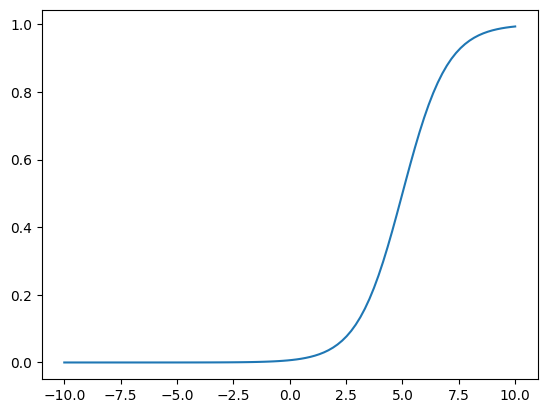

In [261]:
# Deactivation Functions

def sigmoid(x):
    return 1 / (1 + np.exp(-x+5))

def func_sintering(params, x, y):
    k = params
    model_y1 = (1 / (1 + k[0] * x**k[1])) * (1 - 1 / (1 + k[2] * np.exp(-x+k[3])))
    model_y2 = (k[4] * (x - k[3]) + (1 / (1 + k[0] * k[3]**k[1])) * (1 - 1 / (1 + k[2]))) * (1 / (1 + k[2] * np.exp(-x+k[3])))
    return np.sum((model_y1 + model_y2 - y)**2)

x = np.linspace(-10,10,100)
y = sigmoid(x)

plt.plot(x,y)

In [262]:
# Optimization
initial_params = [0.1,1,0.1,50,-1]
bounds = [(0,np.inf),(0,np.inf),(0,np.inf),(0,60),(-np.inf,0)]

args = (Acc_MeOH_r1,Act)

result = minimize(func_sintering,initial_params,args=args,bounds=bounds)

In [263]:
# 최적화 결과 출력
print(f"최적화 결과: {result}")

# 최적의 매개변수 추출
k = result.x
print(f"최적의 k: {k}")

# 예측 Act1 계산
x = np.linspace(0,Acc_MeOH_r1[-1],10000)
Act_s1_cal = (1 / (1 + k[0] * x**k[1])) * (1 - 1 / (1 + k[2] * np.exp(-x+k[3]))) + (k[4] * (x - k[3]) + (1 / (1 + k[0] * k[3]**k[1])) * (1 - 1 / (1 + k[2]))) * (1 / (1 + k[2] * np.exp(-x+k[3])))

최적화 결과:   message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 0.006535634142735374
        x: [ 2.840e-02  6.298e-01  1.284e+02  5.899e+01 -1.321e-03]
      nit: 61
      jac: [-6.080e-05 -6.794e-06 -2.757e-06  3.969e-05  2.681e-04]
     nfev: 414
     njev: 69
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
최적의 k: [ 2.84004283e-02  6.29812998e-01  1.28384755e+02  5.89902920e+01
 -1.32061280e-03]


Text(0, 0.5, 'Catalyst Activity')

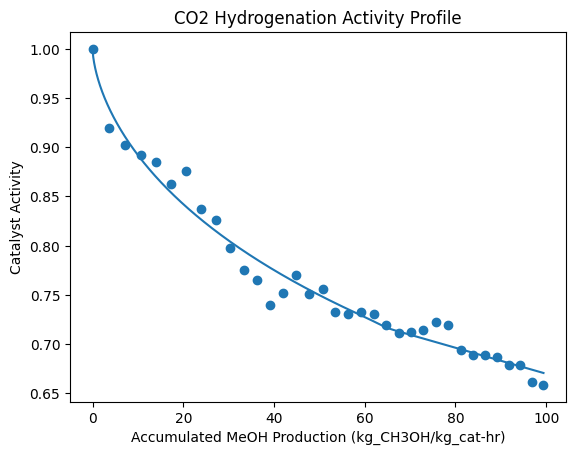

In [271]:
plt.scatter(Acc_MeOH_r1,Act)
plt.plot(x,Act_s1_cal)
plt.title('CO2 Hydrogenation Activity Profile')
plt.xlabel('Accumulated MeOH Production (kg_CH3OH/kg_cat-hr)')
plt.ylabel('Catalyst Activity')